<a href="https://colab.research.google.com/github/eduardopadilla3/Unit1_build_code/blob/master/code_for__sprintbuild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 3000)



In [7]:
a = pd.read_csv(r"/content/nba_games_all.csv")
spread = pd.read_csv(r"/content/nba_betting_spread.csv")

In [8]:
a.head()

,game_id,game_date,matchup,team_id,is_home,wl,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,a_team_id,season_year,season_type,season
0,20800741,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,39.0,74.0,0.527,4.0,13.0,0.308,29.0,37.0,1.0,8.0,36.0,44,19.0,5.0,4.0,18.0,26.0,111,1610612758,2008,Regular Season,2008-09
1,20800701,2009-01-31,POR vs. UTA,1610612762,f,L,26.0,22.0,0.542,240,37.0,68.0,0.544,5.0,20.0,0.250,29.0,37.0,1.0,7.0,20.0,27,17.0,6.0,0.0,15.0,22.0,108,1610612757,2008,Regular Season,2008-09
2,20800584,2009-01-16,MEM vs. UTA,1610612762,f,W,24.0,16.0,0.600,240,37.0,71.0,0.521,7.0,19.0,0.368,20.0,27.0,1.0,7.0,26.0,33,23.0,9.0,3.0,15.0,22.0,101,1610612763,2008,Regular Season,2008-09
3,20800558,2009-01-12,IND @ UTA,1610612762,t,W,23.0,15.0,0.605,240,39.0,85.0,0.459,8.0,18.0,0.444,34.0,37.0,1.0,9.0,31.0,40,24.0,10.0,6.0,8.0,20.0,120,1610612754,2008,Regular Season,2008-09
4,20800440,2008-12-27,HOU vs. UTA,1610612762,f,L,18.0,14.0,0.563,290,49.0,100.0,0.490,5.0,13.0,0.385,12.0,18.0,1.0,11.0,29.0,40,35.0,13.0,7.0,9.0,27.0,115,1610612745,2008,Regular Season,2008-09


In [9]:

a = a.query('season_type == "Regular Season" & season_year >= 2010')

spread = spread.query('book_name == "Bookmaker"')
a = a.sort_values(by=['game_id'])

a = pd.merge(a, spread, how='inner', on='game_id')

In [10]:
# get pt dif
p = abs((a['pts'] - a['pts'].shift(-1))[::2])
p = pd.concat([p] * 2).sort_index().reset_index(drop=True)
a.loc[:, 'PtDif'] = pd.Series(p)


In [11]:
# Spread Covered

YN = []
for i, j in a.iterrows():
    if a.loc[i, 'is_home'] == 't':
        if a.loc[i, 'wl'] == 'W':
            d = a.loc[i, 'PtDif'] + a.loc[i, 'spread2']
            if d > 0:
                YN.append('y')
            elif d < 0:
                YN.append('n')
            else:
                YN.append('p')

        elif a.loc[i, 'wl'] == 'L':
            d = a.loc[i, 'PtDif'] - (a.loc[i, 'spread2'])
            if d > 0:
                YN.append('n')
            elif d < 0:
                YN.append('y')
            else:
                YN.append('p')

    if a.loc[i, 'is_home'] == 'f':
        if a.loc[i, 'wl'] == 'W':
            d = a.loc[i, 'PtDif'] + a.loc[i, 'spread1']
            if d > 0:
                YN.append('y')
            elif d < 0:
                YN.append('n')
            else:
                YN.append('p')
        elif a.loc[i, 'wl'] == 'W':
            YN.append('y')
        elif a.loc[i, 'wl'] == 'L':
            d = a.loc[i, 'PtDif'] - (a.loc[i, 'spread1'])
            if d > 0:
                YN.append('n')
            elif d < 0:
                YN.append('y')
            else:
                YN.append('p')

a.loc[:, 'Spread_covered'] = pd.Series(YN)

In [12]:
# Favorite(y/n)

YN = []
for i, j in a.iterrows():
    if a.loc[i, 'is_home'] == 't':
        if a.loc[i, 'spread2'] < 0:
            YN.append(1)
        elif a.loc[i, 'spread2'] > 0:
            YN.append(0)
        else:
            YN.append(2)
    elif a.loc[i, 'is_home'] == 'f':
        if a.loc[i, 'spread1'] < 0:
            YN.append(1)
        elif a.loc[i, 'spread1'] > 0:
            YN.append(0)
        else:
            YN.append(2)

a.loc[:, 'Favorite'] = pd.Series(YN)


In [13]:
# Loss Streak
WL = []

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2010:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2011:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2012:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2013:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2014:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2015:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2016:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2017:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L':
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

a.loc[:, 'Loss Streak'] = pd.Series(WL)


In [14]:
# Previous Loss was by 10+ points
WL = []
c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2010:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2011:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2012:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2013:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2014:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2015:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2016:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2017:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 10:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

a.loc[:, 'Prev_Blowout_L'] = pd.Series(WL)


In [15]:
# Overall Underdog
money = []
count = 0
for i, j in a.iterrows():
    if a.loc[i, 'Favorite'] == 0:
        if a.loc[i, 'is_home'] == 't':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price2']))
                money.append(count)
            else:
                money.append(count)

        elif a.loc[i, 'is_home'] == 'f':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price1']))
                money.append(count)
            else:
                money.append(count)
    else:
        money.append(count)

a.loc[:, 'Overall_Underdog'] = pd.Series(money)


In [16]:
# Home Underdog
money = []
count = 0
for i, j in a.iterrows():
    if a.loc[i, 'Favorite'] == 0 and a.loc[i, 'is_home'] == 't':
        if a.loc[i, 'is_home'] == 't':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price2']))
                money.append(count)
            else:
                money.append(count)

        elif a.loc[i, 'is_home'] == 'f':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price1']))
                money.append(count)
            else:
                money.append(count)
    else:
        money.append(count)

a.loc[:, 'Home_Underdog'] = pd.Series(money)

In [17]:
# Blowout Underdog (1+)
money = []
count = 0
for i, j in a.iterrows():
    if a.loc[i, 'Favorite'] == 0 and a.loc[i, 'Prev_Blowout_L'] > 0:
        if a.loc[i, 'is_home'] == 't':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price2']))
                money.append(count)
            else:
                money.append(count)

        elif a.loc[i, 'is_home'] == 'f':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price1']))
                money.append(count)
            else:
                money.append(count)
    else:
        money.append(count)
a.loc[:, 'Blowout_1+_Underdog'] = pd.Series(money)

In [18]:
# Blowout2 Underdog
money = []
count = 0
for i, j in a.iterrows():
    if a.loc[i, 'Favorite'] == 0 and a.loc[i, 'Prev_Blowout_L'] == 2:
        if a.loc[i, 'is_home'] == 't':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price2']))
                money.append(count)
            else:
                money.append(count)

        elif a.loc[i, 'is_home'] == 'f':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price1']))
                money.append(count)
            else:
                money.append(count)
    else:
        money.append(count)
a.loc[:, 'Blowout2_Underdog'] = pd.Series(money)

In [19]:
# Blowout2+ Underdog
money = []
count = 0
for i, j in a.iterrows():
    if a.loc[i, 'Favorite'] == 0 and a.loc[i, 'Prev_Blowout_L'] >= 2:
        if a.loc[i, 'is_home'] == 't':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price2']))
                money.append(count)
            else:
                money.append(count)

        elif a.loc[i, 'is_home'] == 'f':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price1']))
                money.append(count)
            else:
                money.append(count)
    else:
        money.append(count)
a.loc[:, 'Blowout2+_Underdog'] = pd.Series(money)

In [20]:
# Away Underdog
money = []
count = 0
for i, j in a.iterrows():
    if a.loc[i, 'Favorite'] == 0 and a.loc[i, 'is_home'] == 'f':
        if a.loc[i, 'is_home'] == 't':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price2']))
                money.append(count)
            else:
                money.append(count)

        elif a.loc[i, 'is_home'] == 'f':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price1']))
                money.append(count)
            else:
                money.append(count)
    else:
        money.append(count)

a.loc[:, 'Away_Underdog'] = pd.Series(money)

In [21]:
a = a[['game_id', 'game_date', 'matchup', 'team_id_x', 'a_team_id_y', 'is_home', 'wl', 'w', 'l', 'w_pct', 'season_year', 'PtDif', 'pts',
       'spread1', 'spread2', 'price1', 'price2', 'Spread_covered', 'Favorite', 'Loss Streak', 'Prev_Blowout_L', 'Overall_Underdog',
       'Away_Underdog', 'Home_Underdog', 'Blowout_1+_Underdog', 'Blowout2+_Underdog']]

In [39]:
# Overall favorite
money = []
count = 0
for i, j in a.iterrows():
    if a.loc[i, 'Favorite'] == 1:
        if a.loc[i, 'is_home'] == 't':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price2']))
                money.append(count)
            else:
                money.append(count)

        elif a.loc[i, 'is_home'] == 'f':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price1']))
                money.append(count)
            else:
                money.append(count)
    else:
        money.append(count)

a.loc[:, 'Overall_Favorite'] = pd.Series(money)

In [43]:
# Blowout2+ AUnderdog
money = []
count = 0
for i, j in a.iterrows():
    if a.loc[i, 'Favorite'] == 0 and a.loc[i, 'Prev_Blowout_L'] >= 2 and a.loc[i, 'is_home'] == 'f':
        if a.loc[i, 'is_home'] == 't':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price2']))
                money.append(count)
            else:
                money.append(count)

        elif a.loc[i, 'is_home'] == 'f':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price1']))
                money.append(count)
            else:
                money.append(count)
    else:
        money.append(count)
a.loc[:, 'Blowout2+_AUnderdog'] = pd.Series(money)


In [46]:
# Previous Loss was by 15+ points
WL = []

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2010:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2011:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2012:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2013:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2014:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2015:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2016:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c19 = c20 = c21 = c22 = c23 = c24 = c25 = c26 = c27 = c28 = c29 = c30 = 0
for i, j in a.iterrows():
    if a.loc[i, 'season_year'] == 2017:

        if a.loc[i, 'team_id_x'] == 1610612766:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c1)
                c1 += 1
            else:
                WL.append(c1)
                c1 = 0
        elif a.loc[i, 'team_id_x'] == 1610612749:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c2)
                c2 += 1
            else:
                WL.append(c2)
                c2 = 0
        elif a.loc[i, 'team_id_x'] == 1610612742:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c3)
                c3 += 1
            else:
                WL.append(c3)
                c3 = 0
        elif a.loc[i, 'team_id_x'] == 1610612750:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c4)
                c4 += 1
            else:
                WL.append(c4)
                c4 = 0
        elif a.loc[i, 'team_id_x'] == 1610612760:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c5)
                c5 += 1
            else:
                WL.append(c5)
                c5 = 0
        elif a.loc[i, 'team_id_x'] == 1610612743:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c6)
                c6 += 1
            else:
                WL.append(c6)
                c6 = 0
        elif a.loc[i, 'team_id_x'] == 1610612745:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c7)
                c7 += 1
            else:
                WL.append(c7)
                c7 = 0
        elif a.loc[i, 'team_id_x'] == 1610612747:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c8)
                c8 += 1
            else:
                WL.append(c8)
                c8 = 0
        elif a.loc[i, 'team_id_x'] == 1610612738:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c9)
                c9 += 1
            else:
                WL.append(c9)
                c9 = 0
        elif a.loc[i, 'team_id_x'] == 1610612755:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c10)
                c10 += 1
            else:
                WL.append(c10)
                c10 = 0
        elif a.loc[i, 'team_id_x'] == 1610612761:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c11)
                c11 += 1
            else:
                WL.append(c11)
                c11 = 0
        elif a.loc[i, 'team_id_x'] == 1610612759:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c12)
                c12 += 1
            else:
                WL.append(c12)
                c12 = 0
        elif a.loc[i, 'team_id_x'] == 1610612753:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c13)
                c13 += 1
            else:
                WL.append(c13)
                c13 = 0
        elif a.loc[i, 'team_id_x'] == 1610612751:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c14)
                c14 += 1
            else:
                WL.append(c14)
                c14 = 0
        elif a.loc[i, 'team_id_x'] == 1610612756:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c15)
                c15 += 1
            else:
                WL.append(c15)
                c15 = 0
        elif a.loc[i, 'team_id_x'] == 1610612740:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c16)
                c16 += 1
            else:
                WL.append(c16)
                c16 = 0
        elif a.loc[i, 'team_id_x'] == 1610612744:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c17)
                c17 += 1
            else:
                WL.append(c17)
                c17 = 0
        elif a.loc[i, 'team_id_x'] == 1610612746:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c18)
                c18 += 1
            else:
                WL.append(c18)
                c18 = 0
        elif a.loc[i, 'team_id_x'] == 1610612748:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c19)
                c19 += 1
            else:
                WL.append(c19)
                c19 = 0
        elif a.loc[i, 'team_id_x'] == 1610612752:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c20)
                c20 += 1
            else:
                WL.append(c20)
                c20 = 0
        elif a.loc[i, 'team_id_x'] == 1610612758:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c21)
                c21 += 1
            else:
                WL.append(c21)
                c21 = 0
        elif a.loc[i, 'team_id_x'] == 1610612757:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c22)
                c22 += 1
            else:
                WL.append(c22)
                c22 = 0
        elif a.loc[i, 'team_id_x'] == 1610612762:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c23)
                c23 += 1
            else:
                WL.append(c23)
                c23 = 0
        elif a.loc[i, 'team_id_x'] == 1610612764:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c24)
                c24 += 1
            else:
                WL.append(c24)
                c24 = 0
        elif a.loc[i, 'team_id_x'] == 1610612763:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c25)
                c25 += 1
            else:
                WL.append(c25)
                c25 = 0
        elif a.loc[i, 'team_id_x'] == 1610612737:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c26)
                c26 += 1
            else:
                WL.append(c26)
                c26 = 0
        elif a.loc[i, 'team_id_x'] == 1610612739:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c27)
                c27 += 1
            else:
                WL.append(c27)
                c27 = 0
        elif a.loc[i, 'team_id_x'] == 1610612741:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c28)
                c28 += 1
            else:
                WL.append(c28)
                c28 = 0
        elif a.loc[i, 'team_id_x'] == 1610612765:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c29)
                c29 += 1
            else:
                WL.append(c29)
                c29 = 0
        elif a.loc[i, 'team_id_x'] == 1610612754:
            if a.loc[i, 'wl'] == 'L' and a.loc[i, 'PtDif'] >= 15:
                WL.append(c30)
                c30 += 1
            else:
                WL.append(c30)
                c30 = 0

a.loc[:, 'Blowout15+'] = pd.Series(WL)

In [47]:
# Blowout15+
money = []
count = 0
for i, j in a.iterrows():
    if a.loc[i, 'Favorite'] == 0 and a.loc[i, 'Blowout15+'] >= 1:
        if a.loc[i, 'is_home'] == 't':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price2']))
                money.append(count)
            else:
                money.append(count)

        elif a.loc[i, 'is_home'] == 'f':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price1']))
                money.append(count)
            else:
                money.append(count)
    else:
        money.append(count)
a.loc[:, 'Blowout15+money'] = pd.Series(money)


In [48]:
# Blowout15+ A
money = []
count = 0
for i, j in a.iterrows():
    if a.loc[i, 'Favorite'] == 0 and a.loc[i, 'Blowout15+'] >= 1 and a.loc[i, 'is_home'] == 'f':
        if a.loc[i, 'is_home'] == 't':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price2']))
                money.append(count)
            else:
                money.append(count)

        elif a.loc[i, 'is_home'] == 'f':
            if a.loc[i, 'Spread_covered'] == 'n':
                count = count - 100
                money.append(count)
            elif a.loc[i, 'Spread_covered'] == 'y':
                count = count + 10000 / (abs(a.loc[i, 'price1']))
                money.append(count)
            else:
                money.append(count)
    else:
        money.append(count)
a.loc[:, 'Blowout15+A_money'] = pd.Series(money)


In [49]:
a.head()

,game_id,game_date,matchup,team_id_x,a_team_id_y,is_home,wl,w,l,w_pct,season_year,PtDif,pts,spread1,spread2,price1,price2,Spread_covered,Favorite,Loss Streak,Prev_Blowout_L,Overall_Underdog,Away_Underdog,Home_Underdog,Blowout_1+_Underdog,Blowout2+_Underdog,Overall_Favorite,Blowout2+_AUnderdog,Blowout15+,Blowout15+money,Blowout15+A_money
0,21000044,2010-11-01,CHI vs. POR,1610612757,1610612741,f,L,3.0,1.0,0.750,2010,12.0,98,0.0,0.0,-110.0,-110.0,n,2,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,21000044,2010-11-01,POR @ CHI,1610612741,1610612741,t,W,2.0,1.0,0.667,2010,12.0,110,0.0,0.0,-110.0,-110.0,y,2,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,21000045,2010-11-01,TOR @ SAC,1610612758,1610612758,t,W,3.0,1.0,0.750,2010,3.0,111,6.0,-6.0,-110.0,-110.0,n,1,0,0,0.000000,0.000000,0.0,0.0,0.0,-100.0,0.0,0,0.0,0.0
3,21000045,2010-11-01,SAC vs. TOR,1610612761,1610612758,f,L,1.0,2.0,0.333,2010,3.0,108,6.0,-6.0,-110.0,-110.0,y,0,0,0,90.909091,90.909091,0.0,0.0,0.0,-100.0,0.0,0,0.0,0.0
4,21000046,2010-11-01,SAS @ LAC,1610612746,1610612746,t,L,0.0,4.0,0.000,2010,9.0,88,-8.0,8.0,-110.0,-110.0,n,0,0,0,-9.090909,90.909091,-100.0,0.0,0.0,-100.0,0.0,0,0.0,0.0


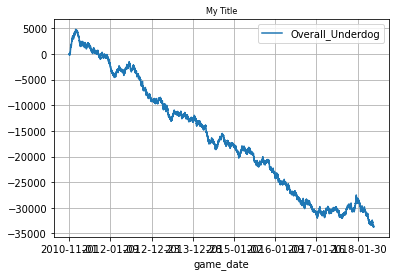

In [26]:
import matplotlib.pyplot as plt
ax = plt.gca()

a.plot(kind='line', x='game_date', y='Overall_Underdog',  ax=ax)
ax.set_title('My Title', fontdict={'fontsize': 8, 'fontweight': 'medium'})
plt.grid()
#plt.ylim(-35000, 10000)
#_=plt.xticks(rotation=90)    

plt.show()

In [32]:
#Short Summary:
# I will be exploring the sports betting market. I will be focusing on underdog trends and how they 
#can be used for sports betting.

In [27]:
nba_teams = pd.read_csv(r"/content/nba_teams_all.csv")

In [28]:
b = pd.merge(a, nba_teams, how='inner', on='team_id_x')
b = b[['game_id', 'game_date', 'name', 'season_year', 'Favorite', 'Spread_covered']]

In [29]:
b.head()

,game_id,game_date,name,season_year,Favorite,Spread_covered
0,21000044,2010-11-01,POR,2010,2,n
1,21000052,2010-11-02,POR,2010,0,y
2,21000067,2010-11-04,POR,2010,1,n
3,21000087,2010-11-06,POR,2010,1,y
4,21000094,2010-11-07,POR,2010,0,n


In [30]:
u = b.query('Favorite == "0"')
f = b.query('Favorite == "1"')

In [31]:
r = pd.read_csv(r"/content/record.csv")

In [33]:
u.groupby('name')['Spread_covered'].value_counts()

name  Spread_covered
ATL   y                 138
      n                 128
      p                   3
BKN   n                 215
      y                 210
      p                   6
BOS   y                 132
      n                 105
      p                   4
CHA   n                 203
      y                 168
      p                  11
CHI   y                 145
      n                 121
      p                   3
CLE   n                 149
      y                 145
      p                   4
DAL   y                 156
      n                 133
      p                   3
DEN   y                 166
      n                 135
      p                   6
DET   n                 187
      y                 186
      p                   3
GSW   y                  87
      n                  84
      p                   4
HOU   y                  95
      n                  94
      p                   5
IND   n                 123
      y                 118

In [34]:
f.groupby('name')['Spread_covered'].value_counts()

name  Spread_covered
ATL   n                 168
      y                 168
      p                   8
BKN   n                  95
      y                  88
      p                   2
BOS   n                 184
      y                 180
      p                   9
CHA   n                 116
      y                 109
      p                   4
CHI   n                 176
      y                 158
      p                   4
CLE   n                 177
      y                 135
      p                   5
DAL   y                 153
      n                 151
      p                   7
DEN   y                 153
      n                 146
      p                   8
DET   n                 119
      y                 112
      p                   3
GSW   y                 219
      n                 203
      p                  13
HOU   y                 216
      n                 195
      p                   8
IND   y                 185
      n                 173

In [32]:
r.head()
# ATS wins, losses, and pushes as underdog and favorite

,name,conference,W_u,L_u,P_u,W_f,L_f,P_f
0,ATL,EAST,138,128,3,168,168,8
1,BKN,EAST,210,215,6,88,95,2
2,BOS,EAST,132,105,4,180,184,9
3,CHA,EAST,168,203,11,109,116,4
4,CHI,EAST,145,121,3,158,176,4


In [36]:
fig = go.Figure(data=[
    go.Bar(name='W', x=r['name'], y=r['W_u']),
    go.Bar(name='L', x=r['name'], y=r['L_u'], )
], layout=go.Layout(
    title="Underdogs ATS",
    yaxis_title="Games"))
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
#Blog Outline
#
#Intro- what is a spread and what is considered an underdog

#First visualization
#explore historical trends

#second visualizaion
#compare teams

#lessen the scope that we will be looking at the underdogs with and produce another graph

#Conclusion: why or why not are underdogs undervalued

In [37]:
fig = go.Figure(data=[
    go.Bar(name='W', x=r['name'], y=r['W_f']),
    go.Bar(name='L', x=r['name'], y=r['L_f'], )
], layout=go.Layout(
    title="Favorites ATS",
    yaxis_title="Games"))
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

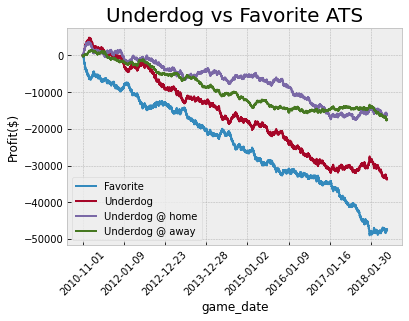

In [41]:
plt.style.use("bmh")
ax = plt.gca()

a.plot(kind='line', x='game_date', y='Overall_Favorite', ax=ax, label='Favorite')
a.plot(kind='line', x='game_date', y='Overall_Underdog', ax=ax, label='Underdog')
a.plot(kind='line', x='game_date', y='Away_Underdog', ax=ax, label='Underdog @ home')
a.plot(kind='line', x='game_date', y='Home_Underdog', ax=ax, label='Underdog @ away')

ax.set_title('Underdog vs Favorite ATS', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.grid()
plt.grid(b=True)
ax.set_ylabel('Profit($)')

_ = plt.xticks(rotation=45)

plt.show()

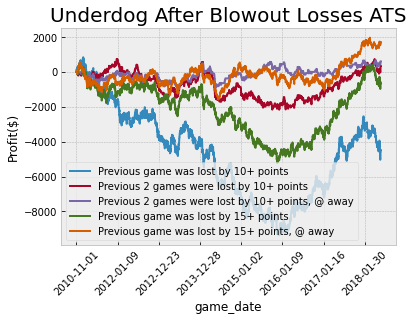

In [50]:
plt.style.use("bmh")
ax = plt.gca()

a.plot(kind='line', x='game_date', y='Blowout_1+_Underdog', ax=ax, label='Previous game was lost by 10+ points')
a.plot(kind='line', x='game_date', y='Blowout2+_Underdog', ax=ax, label='Previous 2 games were lost by 10+ points')
a.plot(kind='line', x='game_date', y='Blowout2+_AUnderdog', ax=ax, label='Previous 2 games were lost by 10+ points, @ away')
a.plot(kind='line', x='game_date', y='Blowout15+money', ax=ax, label='Previous game was lost by 15+ points')
a.plot(kind='line', x='game_date', y='Blowout15+A_money', ax=ax, label='Previous game was lost by 15+ points, @ away')

ax.set_title('Underdog After Blowout Losses ATS', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.grid()
plt.grid(b=True)
ax.set_ylabel('Profit($)')

_ = plt.xticks(rotation=45)

plt.show()
